In [151]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
%run pandas-missing-extension.ipynb

In [153]:
# Se cargan los datasets
leads_df = pd.read_csv('leads.csv')
offers_df = pd.read_csv('offers.csv')

### Primeras filas del dataset leads

In [154]:
leads_df.head()

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,NaN,Corporate Events,Inbound,Nurturing,Not Fit,NaN,2018-05-26,0,Chicago
1,NaN,Taylor1 Harris1,NaN,Inbound,Discarded,Not feeling,Event Management Guide,2018-10-17,0,Denver
2,hbzt0kp1,Alex6 Jackson3,NaN,Inbound,Nurturing,Competitor,NaN,2019-03-29,0,Denver
3,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,NaN,2018-05-26,0,NaN
4,NaN,Drew5 Wilson5,Corporate Events,Inbound,Nurturing,Competitor,NaN,2018-10-17,0,NaN


### Primeras filas del dataset offers

In [155]:
offers_df.head()

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
1,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price
2,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
4,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response


Vemos que en ambos datasets la columna Id contiene valores nulos. Sin embargo, nuestra variable objetivo se encuentra en el dataset offers, por lo que vamos a prescindir de los registros del dataset leads que no cuenten con un Id no nulo que nos permita conectarlos con algun registro en la tabla offers.

In [156]:
# Se eliminan las filas con id's nulos del dataset leads
leads_df.dropna(subset=['Id'], inplace=True)
leads_df.head()

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,NaN,Corporate Events,Inbound,Nurturing,Not Fit,NaN,2018-05-26,0,Chicago
2,hbzt0kp1,Alex6 Jackson3,NaN,Inbound,Nurturing,Competitor,NaN,2019-03-29,0,Denver
3,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,NaN,2018-05-26,0,NaN
5,vwm9vcdc,Harper11 Johnson11,NaN,Inbound,Nurturing,Not the right moment,NaN,2019-03-29,0,NaN
8,kbfjr4vz,Drew6 Taylor17,NaN,Inbound,Nurturing,Not feeling,NaN,2019-03-29,0,Denver


In [157]:
# Encontrar los índices en offers_df que están en leads_df
len(offers_df[offers_df['Id'].isin(leads_df['Id'])].index)

3801

El 62% de los **id's** de **offers** se encuentran también en **leads**. Verifiquemos también si existen duplicados en las columnas **Id's** o **First Name** de la tabla **leads**.

In [158]:
# Revisamos si existen Id's o nombres duplicados en 'leads'
print("-- Duplicates in the Leads dataframe --")
print('duplicated ids: ', sum(leads_df['Id'].value_counts()>1))
print('duplicated names: ', sum(leads_df['First Name'].value_counts()>1))

-- Duplicates in the Leads dataframe --
duplicated ids:  0
duplicated names:  0


Vemos que no existen Id's ni nombres duplicados en leads. Ahora podemos crear un dataset único que contenga la información de ambas tablas.

In [159]:
# Merge de los dataframes df_merged y df_leads
df_merged = pd.merge(leads_df, offers_df, on='Id', how='right', suffixes=(' (leads)', ' (offers)'))
print('Columns: ', len(df_merged))
df_merged.head()

Columns:  6130


,Id,First Name,Use Case (leads),Source,Status (leads),Discarded/Nurturing Reason,Acquisition Campaign,Created Date (leads),Converted,City,Use Case (offers),Status (offers),Created Date (offers),Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Taylor18 Wilson3,Corporate Events,Inbound,Qualified,NaN,VirtualMeetups,2019-05-07,1.0,San Diego,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response


Verificamos la cantidad de valores nulos por columna

In [160]:
df_merged.isnull().sum()

Id                            1168
First Name                    3158
Use Case (leads)              2394
Source                        2331
Status (leads)                2329
Discarded/Nurturing Reason    6097
Acquisition Campaign          5087
Created Date (leads)          2329
Converted                     2329
City                          3609
Use Case (offers)               37
Status (offers)                  0
Created Date (offers)            0
Close Date                       0
Price                          365
Discount code                 1699
Pain                           869
Loss Reason                   3766
dtype: int64

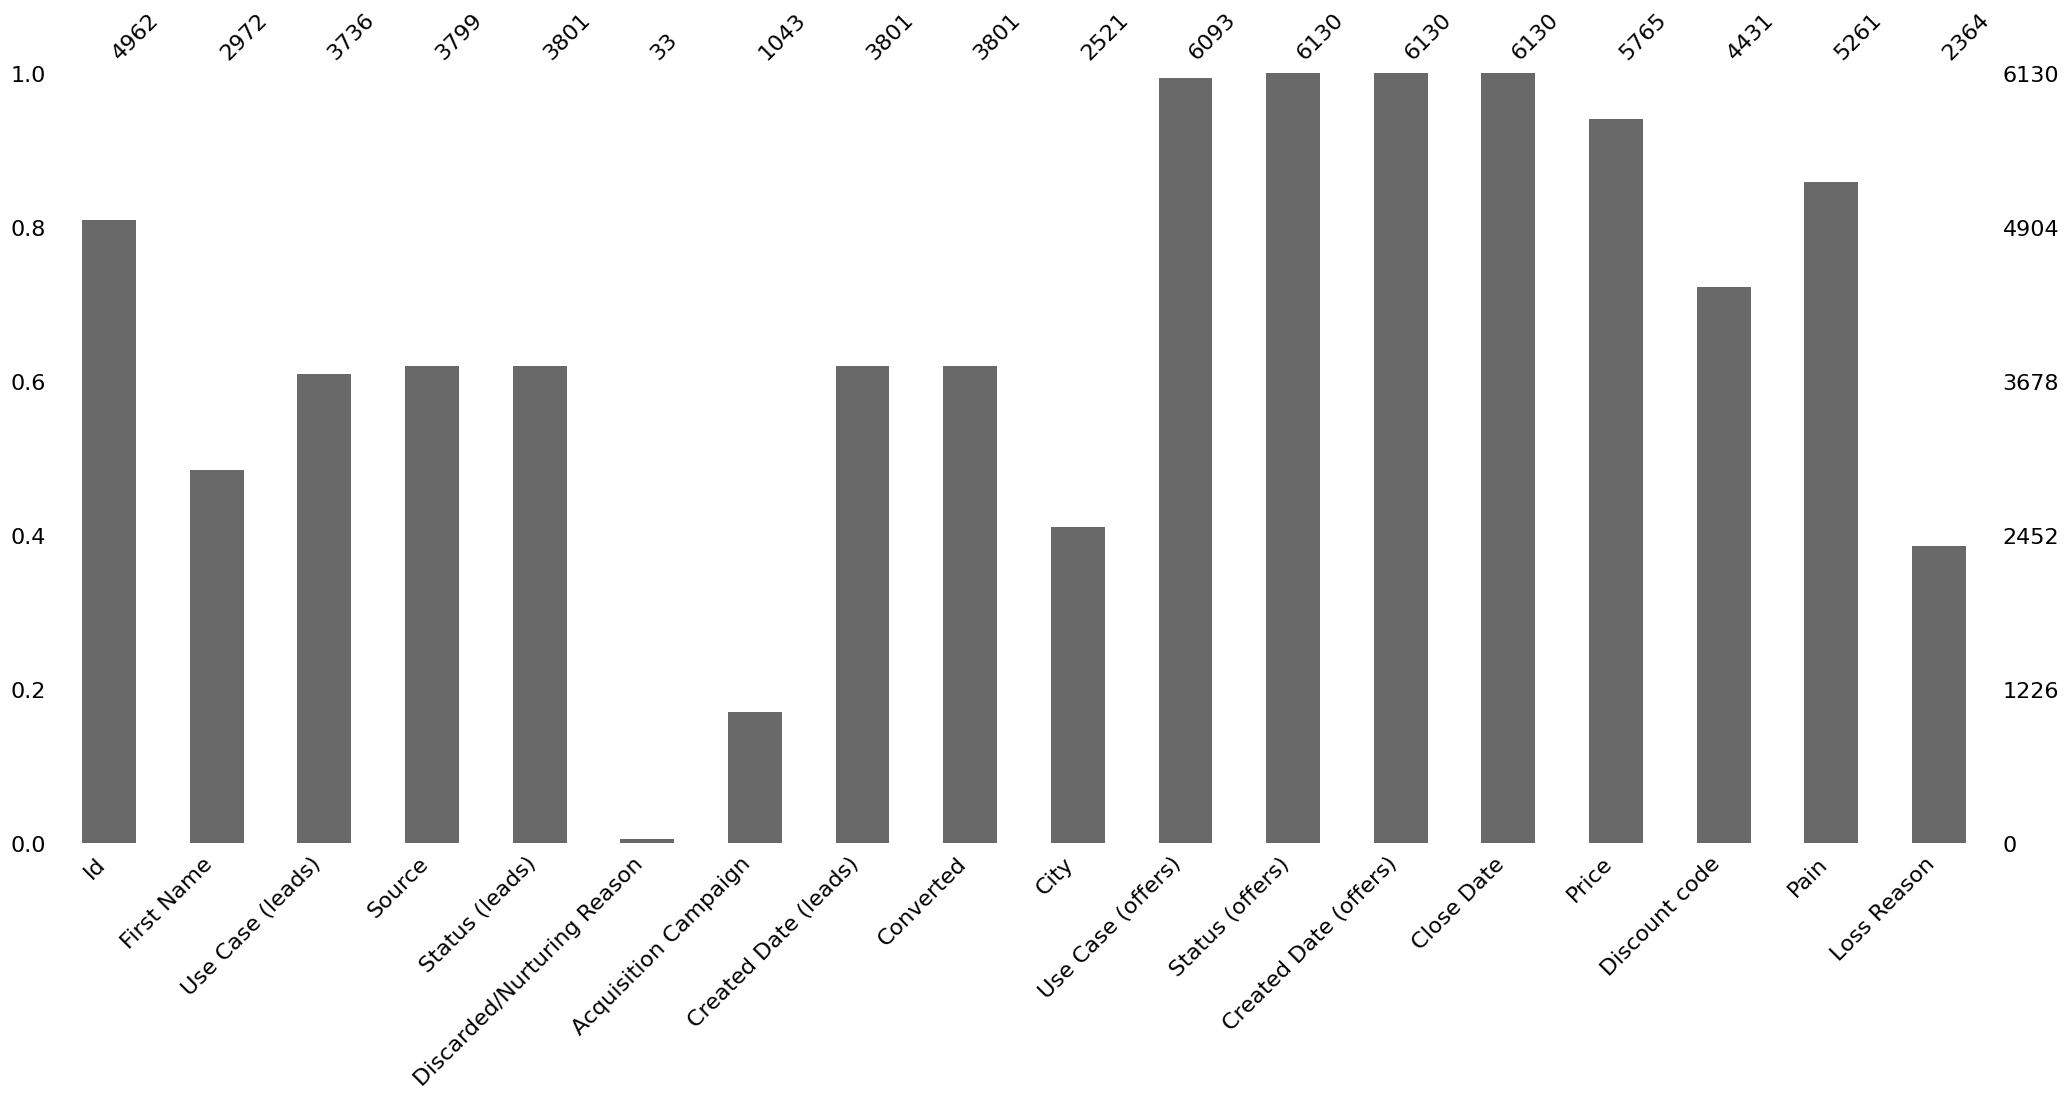

In [161]:
missingno.bar(df=df_merged)
plt.show()

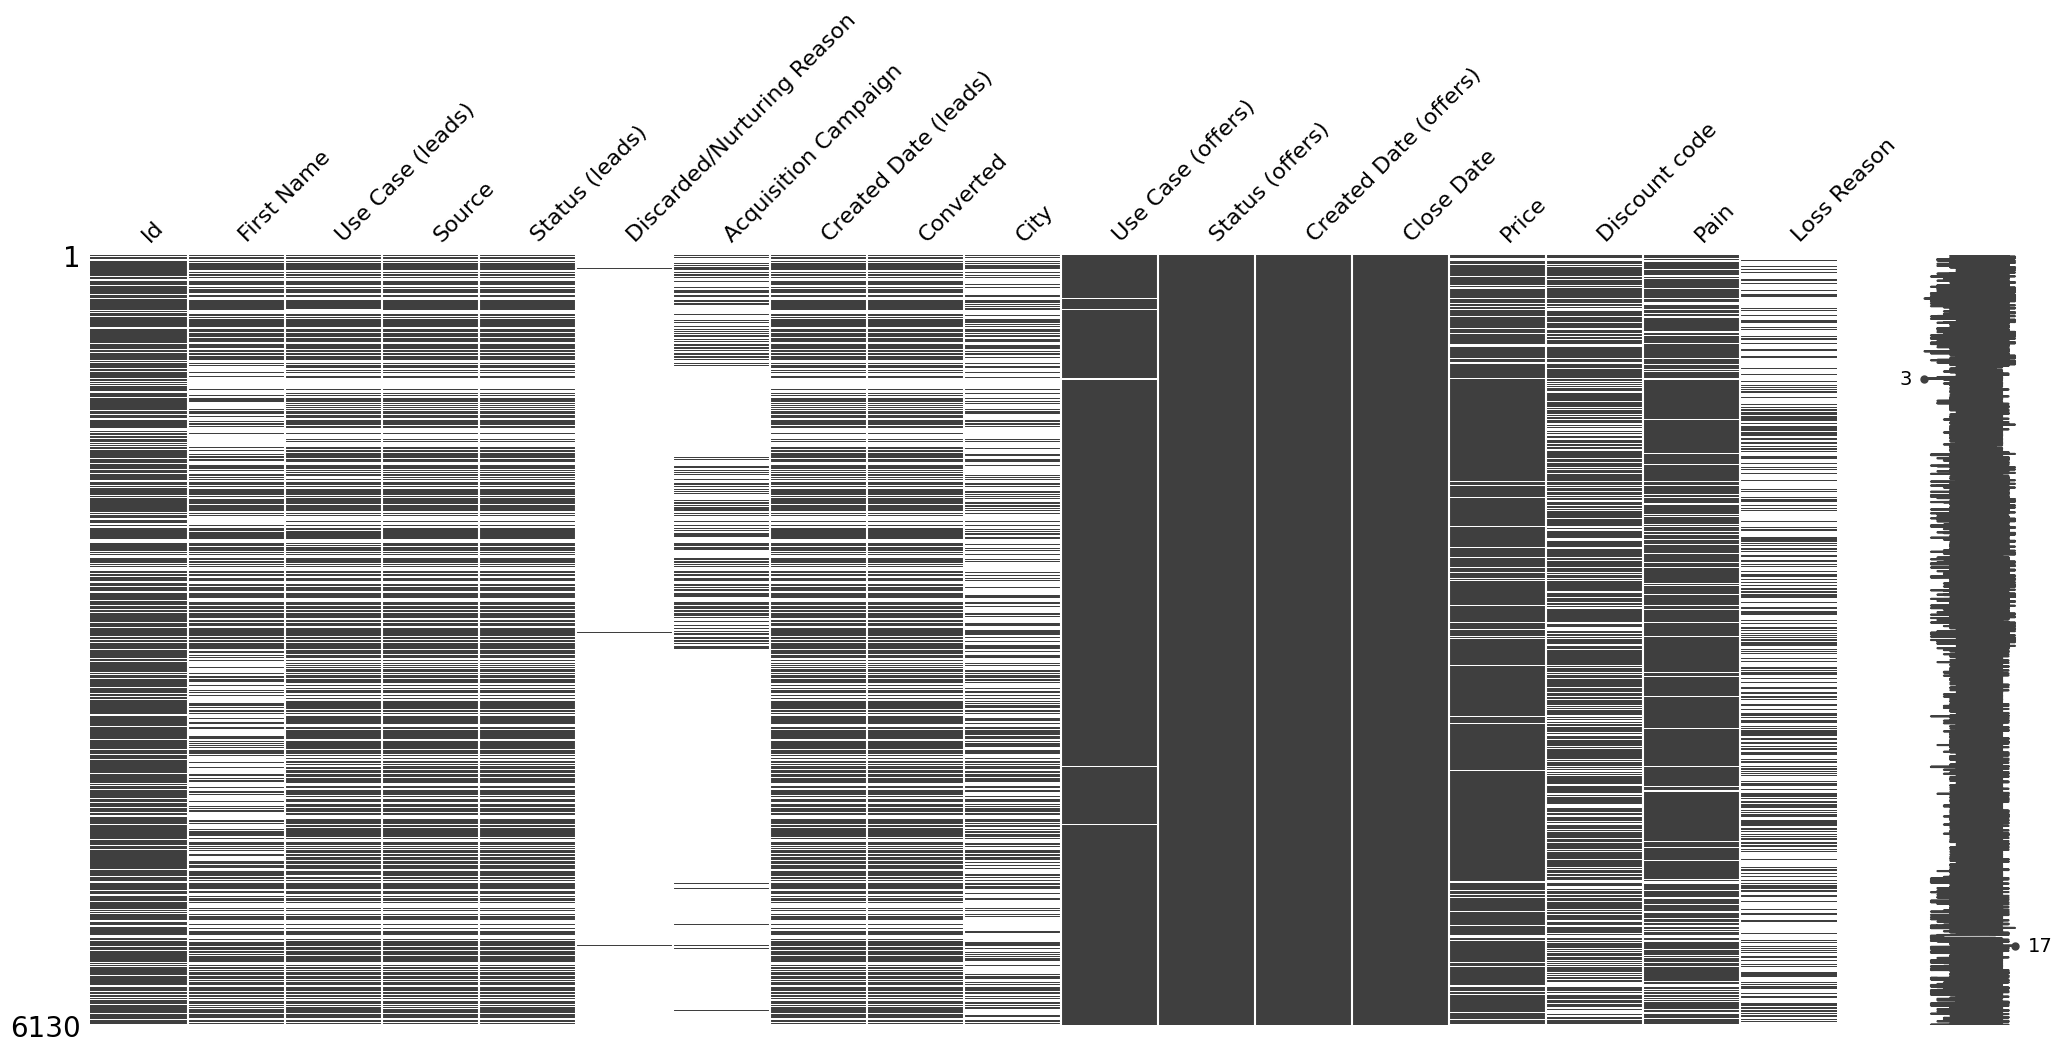

In [162]:
missingno.matrix(df=df_merged)
plt.show()

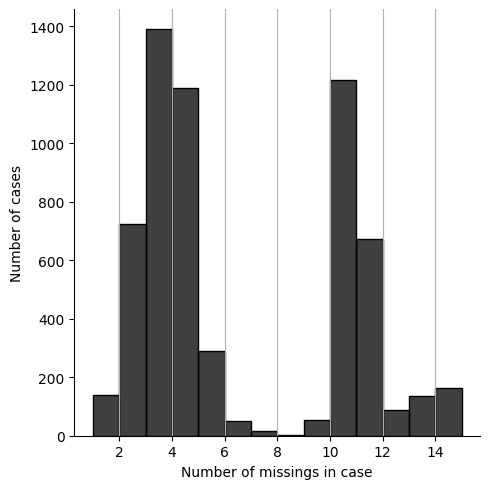

In [163]:
df_merged.missing.missing_case_plot()

c:\Users\Jonathan Diaz\AppData\Local\pypoetry\Cache\virtualenvs\testds-8FQR7iPw-py3.10\lib\site-packages\upsetplot\plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['black' '#0000002e' '#0000002e' ... '#0000002e' '#0000002e' '#0000002e']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
c:\Users\Jonathan Diaz\AppData\Local\pypoetry\Cache\virtualenvs\testds-8FQR7iPw-py3.10\lib\site-packages\upsetplot\plotting.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'solid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["linestyle"].fillna("solid", inplace=True)


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

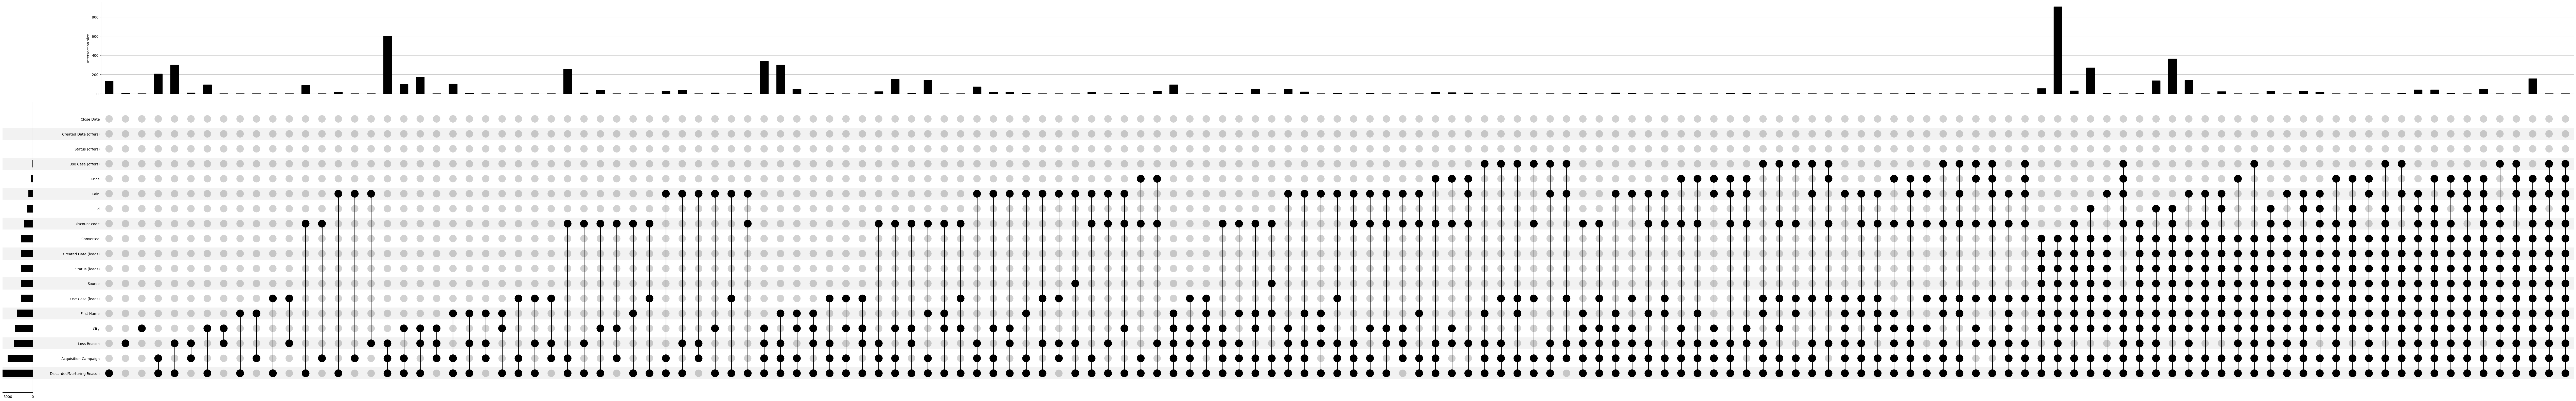

In [164]:
(
    df_merged
    .missing
    .missing_upsetplot(
        variables=None,
        element_size=60
    )
)

En este caso vemos que solo se encuentran 6 registros con la anterior inconsistencia. En este caso no conocemos una manera de determinar si el error se encuentra en la columna 'Loss Reason' o en la columna 'Status'. Por lo que optamos por descartar estos registros. En el caso en que se tuvieran muchos más registros con esta condición descartar estos valores no sería adecuado.

In [165]:
# Borramos filas donde status es "closed won" pero tiene "loss reason"
df_merged.drop(df_merged[(df_merged['Status (offers)']=='Closed Won') & (df_merged['Loss Reason'].notna())].index, inplace=True)
df_merged.head()

,Id,First Name,Use Case (leads),Source,Status (leads),Discarded/Nurturing Reason,Acquisition Campaign,Created Date (leads),Converted,City,Use Case (offers),Status (offers),Created Date (offers),Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Taylor18 Wilson3,Corporate Events,Inbound,Qualified,NaN,VirtualMeetups,2019-05-07,1.0,San Diego,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response


Podemos ver que tenemos una gran cantidad de valores nulos. Esto no es adecuado para entrenar un modelo de clasificación. Por ahora empecemos descartando la columna **Discarded/Nurturing Reason** ya que 99.5% son valores nulos por lo que no es una variable que aporte al modelo de clasificación. Debido a que para cada valor de **Id** en la tabla **leads** hay un único nombre podemos prescindir del nombre del cliente y quedarnos unicamente con su **Id**.

In [166]:
df_merged.drop(columns=[
    'Discarded/Nurturing Reason',
    'First Name',
    'Loss Reason'
], axis=1, inplace=True)
df_merged.head()

,Id,Use Case (leads),Source,Status (leads),Acquisition Campaign,Created Date (leads),Converted,City,Use Case (offers),Status (offers),Created Date (offers),Close Date,Price,Discount code,Pain
0,doqyhjtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations
3,cturqi48,Corporate Events,Inbound,Qualified,VirtualMeetups,2019-05-07,1.0,San Diego,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control


Ahora reemplazando los valores nulos en la columna **Id** por valores únicos ya que esta columna debe corresponder a un identificador único.

In [167]:
# Generar valores únicos para reemplazar valores nulos por algún valor en la columna Id
valores_unicos = range(1000, 1000 + df_merged['Id'].isna().sum())
df_merged.loc[df_merged['Id'].isna(), 'Id'] = valores_unicos
df_merged['Id'] = df_merged['Id'].astype(str)
df_merged.head()

,Id,Use Case (leads),Source,Status (leads),Acquisition Campaign,Created Date (leads),Converted,City,Use Case (offers),Status (offers),Created Date (offers),Close Date,Price,Discount code,Pain
0,doqyhjtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations
1,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations
2,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations
3,cturqi48,Corporate Events,Inbound,Qualified,VirtualMeetups,2019-05-07,1.0,San Diego,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control
4,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control


Revisamos nuevamente porcentaje de nulos por columna

In [168]:
df_merged.isnull().sum()/len(df_merged)*100

Id                        0.000000
Use Case (leads)         39.026780
Source                   37.998040
Status (leads)           37.965382
Acquisition Campaign     82.984977
Created Date (leads)     37.965382
Converted                37.965382
City                     58.866754
Use Case (offers)         0.604180
Status (offers)           0.000000
Created Date (offers)     0.000000
Close Date                0.000000
Price                     5.960157
Discount code            27.726976
Pain                     14.190072
dtype: float64

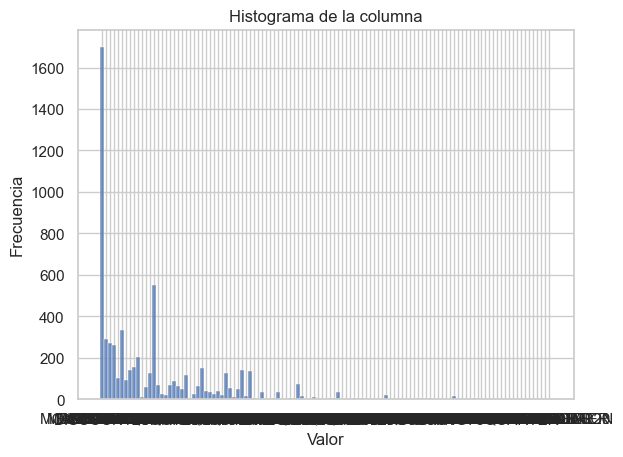

In [185]:
sns.set(style="whitegrid")

# Crear el histograma con Seaborn
sns.histplot(data=df_merged, x='Acquisition Campaign', bins=30, kde=False)

# Añadir etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna')

# Mostrar el histograma
plt.show()

La columna 'Discount code' nos indica un descuento. Podemos reemplazar los valores nulos de por la cadena 'Not code' que nos indicará que no se tiene un descuento.

In [169]:
# Creamos una columna que indica 'Has discount' para indicar cuando se tiene un descuento.
df_merged['Discount code'] = df_merged['Discount code'].fillna('Not Code')
# df_merged['Has discount'] = df_merged['Discount code'].notna()
df_merged.head()

,Id,Use Case (leads),Source,Status (leads),Acquisition Campaign,Created Date (leads),Converted,City,Use Case (offers),Status (offers),Created Date (offers),Close Date,Price,Discount code,Pain
0,doqyhjtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations
1,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,Not Code,operations
2,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations
3,cturqi48,Corporate Events,Inbound,Qualified,VirtualMeetups,2019-05-07,1.0,San Diego,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control
4,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control


In [170]:
df_merged.isnull().sum()

Id                          0
Use Case (leads)         2390
Source                   2327
Status (leads)           2325
Acquisition Campaign     5082
Created Date (leads)     2325
Converted                2325
City                     3605
Use Case (offers)          37
Status (offers)             0
Created Date (offers)       0
Close Date                  0
Price                     365
Discount code               0
Pain                      869
dtype: int64

Verificamos de la columna Id's cuantos id existen duplicados.

In [171]:
(df_merged['Id'].value_counts()>1).value_counts()

count
False    6052
True       35
Name: count, dtype: int64

Estos Id serían clientes que han comprado más de una vez, clientes que han desistido más de una vez o clientes que en alguna ocasión compraron el producto y en otra desistieron de comprarlo. Si estos casos son posibles, lo que podemos hacer para tenerlos en cuenta en el modelo es simplemente agregar una columna indicando el número de registro para ese cliente, por ejemplo si se ha registrado un cliente por tercera vez aparecerá un 3 en dicha columna.

In [172]:
df_merged['Created Date (offers)'] = pd.to_datetime(df_merged['Created Date (offers)'])
df_merged['purchase_number'] = df_merged.duplicated(subset='Id', keep='first')
df_merged.sort_values(by=['Id', 'Created Date (offers)'], inplace=True)
df_merged['purchase_number'] = df_merged.groupby('Id')['purchase_number'].cumsum() + 1

In [173]:
dup = (df_merged['Id'].value_counts()>1)
indices = dup[dup==True].index
df_duplicates = df_merged[df_merged['Id'].isin(indices)].sort_values('Id')


duplicated_closed_clients = set((df_duplicates[df_duplicates['Status (offers)']=='Closed Lost']['Id'].value_counts()).index)
duplicated_won_clients = set((df_duplicates[df_duplicates['Status (offers)']=='Closed Won']['Id'].value_counts()).index)
print(len(duplicated_closed_clients & duplicated_won_clients))
# Clientes
duplicated_closed_clients & duplicated_won_clients

17


{'85hvce1u',
 'anusqayo',
 'cmk7rx2w',
 'g5q27v0e',
 'ibreb91k',
 'j90atvpj',
 'oqdli760',
 'p5p3jdar',
 'pm6irehj',
 'pnzvissb',
 'qhcwgvqj',
 's4l7fe1m',
 's4odpis2',
 'xwe4j4jj',
 'y3dc5m36',
 'z52nyf59',
 'zptwoiyk'}

In [174]:
df_duplicates[df_duplicates['Id']=='98pp0lyi']

,Id,Use Case (leads),Source,Status (leads),Acquisition Campaign,Created Date (leads),Converted,City,Use Case (offers),Status (offers),Created Date (offers),Close Date,Price,Discount code,Pain,purchase_number
4057,98pp0lyi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educational Seminars,Closed Won,2018-09-04,2018-09-04,240.0,SAVEMONTH50G,quality of delivery,2
1444,98pp0lyi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educational Seminars,Closed Won,2018-10-01,2018-10-01,1018.0,RENEWYEAR30,financial control,2
1918,98pp0lyi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sports Events,Closed Won,2018-12-17,2018-12-26,240.0,SAVEMONTH50G,operations,3
3907,98pp0lyi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Corporate Events,Closed Won,2019-01-21,2019-01-23,240.0,DISCOUNT50POWER,operations,4


<Axes: xlabel='Id', ylabel='Count'>

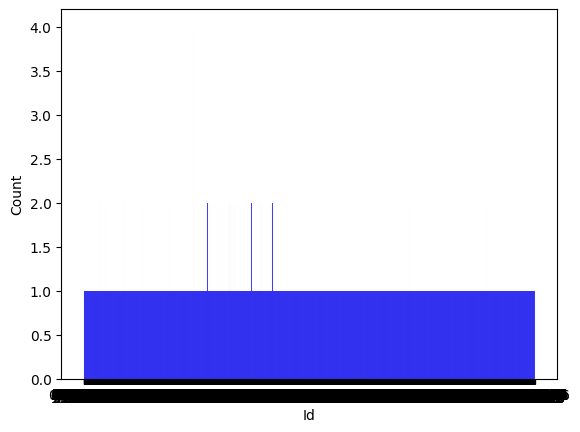

In [175]:
sns.histplot(data=offers_df['Id'], bins=10, kde=False, color='blue')

In [176]:
offers_df[offers_df['Id']=='98pp0lyi']

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
1444,98pp0lyi,Educational Seminars,Closed Won,2018-10-01,2018-10-01,1018.0,RENEWYEAR30,financial control,NaN
1918,98pp0lyi,Sports Events,Closed Won,2018-12-17,2018-12-26,240.0,SAVEMONTH50G,operations,NaN
3907,98pp0lyi,Corporate Events,Closed Won,2019-01-21,2019-01-23,240.0,DISCOUNT50POWER,operations,NaN
4057,98pp0lyi,Educational Seminars,Closed Won,2018-09-04,2018-09-04,240.0,SAVEMONTH50G,quality of delivery,NaN


In [177]:
# Generar valores únicos para reemplazar NaN
valores_unicos = range(1000, 1000 + offers_df['Id'].isna().sum())

# Asignar estos valores únicos a los NaN
offers_df.loc[offers_df['Id'].isna(), 'Id'] = valores_unicos

In [178]:
offers_df['Id'].isnull().sum()

0